# Exploratory data analysis

## Reading in dataset and preparing train/test splits


In [1]:
import os
import pandas as pd

# If you clone this, change the path to whichever path your datasets are in
ROOT_PATH = os.path.join(".", "data")

In [2]:
value_df = pd.read_csv(os.path.join(ROOT_PATH, 'train_values.csv'))
label_df = pd.read_csv(os.path.join(ROOT_PATH, 'train_labels.csv'))

df = pd.merge(value_df, label_df, on='building_id')
# Remove the building id column from feature vector
df.drop('building_id', axis=1, inplace=True)
df_X = df[df.columns[df.columns != 'damage_grade']].copy()
df_y = df['damage_grade'].copy()

display(df.head())
display(df_X.head())
display(df_y.head())

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split

# (random_state): we use a fixed random seed so we get the same results every time. 10% of entire dataset is sufficient for test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=100)

print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(X_test))
print ("Number of training labels: ", len(y_train), "\nNumber of test labels: ", len(y_test))

X_train.head()

Number of training instances:  234540 
Number of test instances:  26061
Number of training labels:  234540 
Number of test labels:  26061


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
22820,8,678,11750,3,35,5,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
230718,17,21,3613,2,10,6,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
65294,20,190,11721,2,10,8,4,t,r,q,...,0,0,0,0,0,0,0,0,0,0
179379,17,811,11295,2,10,9,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
133933,9,772,10140,2,0,4,4,n,r,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train.to_csv(os.path.join(ROOT_PATH, "split_train_values.csv"), index=False)
y_train.to_csv(os.path.join(ROOT_PATH, "split_train_labels.csv"), index=False, header=True)
X_test.to_csv(os.path.join(ROOT_PATH, "split_test_values.csv"), index=False)
y_test.to_csv(os.path.join(ROOT_PATH, "split_test_labels.csv"), index=False, header=True)

## Load already stored dataset

In [10]:
import os

X_train = pd.read_csv(os.path.join(ROOT_PATH, "split_train_values.csv"))
y_train = pd.read_csv(os.path.join(ROOT_PATH, "split_train_labels.csv"))
X_test = pd.read_csv(os.path.join(ROOT_PATH, "split_test_values.csv"))
y_test = pd.read_csv(os.path.join(ROOT_PATH, "split_test_labels.csv"))

print("Train: {}, {}".format(X_train.shape, y_train.shape))
print("Test: {}, {}".format(X_test.shape, y_test.shape))

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

Train: (234540, 38), (234540, 1)
Test: (26061, 38), (26061, 1)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,8,678,11750,3,35,5,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1,17,21,3613,2,10,6,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
2,20,190,11721,2,10,8,4,t,r,q,...,0,0,0,0,0,0,0,0,0,0
3,17,811,11295,2,10,9,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,9,772,10140,2,0,4,4,n,r,n,...,0,0,0,0,0,0,0,0,0,0


,damage_grade
0,2
1,2
2,2
3,3
4,2


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,457,8492,2,0,7,7,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,10,127,10118,2,5,4,4,n,r,q,...,0,0,0,0,0,0,0,0,0,0
2,27,1155,7854,3,50,19,10,t,i,x,...,0,0,1,0,0,0,0,0,0,0
3,13,829,4265,3,40,26,7,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,3,1229,6027,2,70,3,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0


,damage_grade
0,2
1,2
2,2
3,1
4,3


## Exploration of dataset

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
display(X_train.describe())

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,...,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000,234540.000000
mean,13.897224,700.783112,6254.916837,2.129134,26.573250,8.015515,5.432459,0.088279,0.762160,0.034310,...,0.064722,0.033436,0.008105,0.000972,0.000367,0.001079,0.000188,0.000153,0.000094,0.005172
std,8.033159,412.825497,3646.654389,0.728023,73.762575,4.385864,1.916905,0.283701,0.425762,0.182024,...,0.246036,0.179772,0.089664,0.031164,0.019145,0.032826,0.013696,0.012388,0.009685,0.071729
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3071.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,701.000000,6262.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9411.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


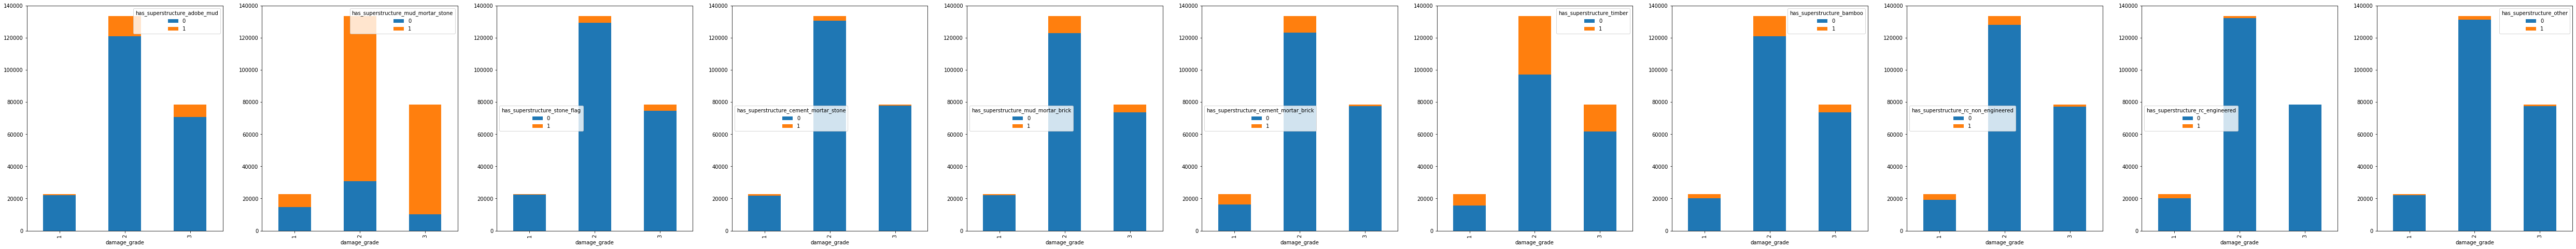

In [14]:
train = X_train.join(y_train)
train.rename(columns={0:'damage_grade'}, inplace=True)

with_ss = X_train.columns[X_train.columns.str.contains('has_superstructure', regex=True)]
fig, axes = plt.subplots(ncols=len(with_ss), figsize=(8*len(with_ss),8))
for i, col in enumerate(with_ss):
  df_plot = train.groupby([col, 'damage_grade']).size().reset_index().pivot(columns=col, index='damage_grade', values=0)
  df_plot.plot(kind='bar', stacked=True, ax=axes[i])

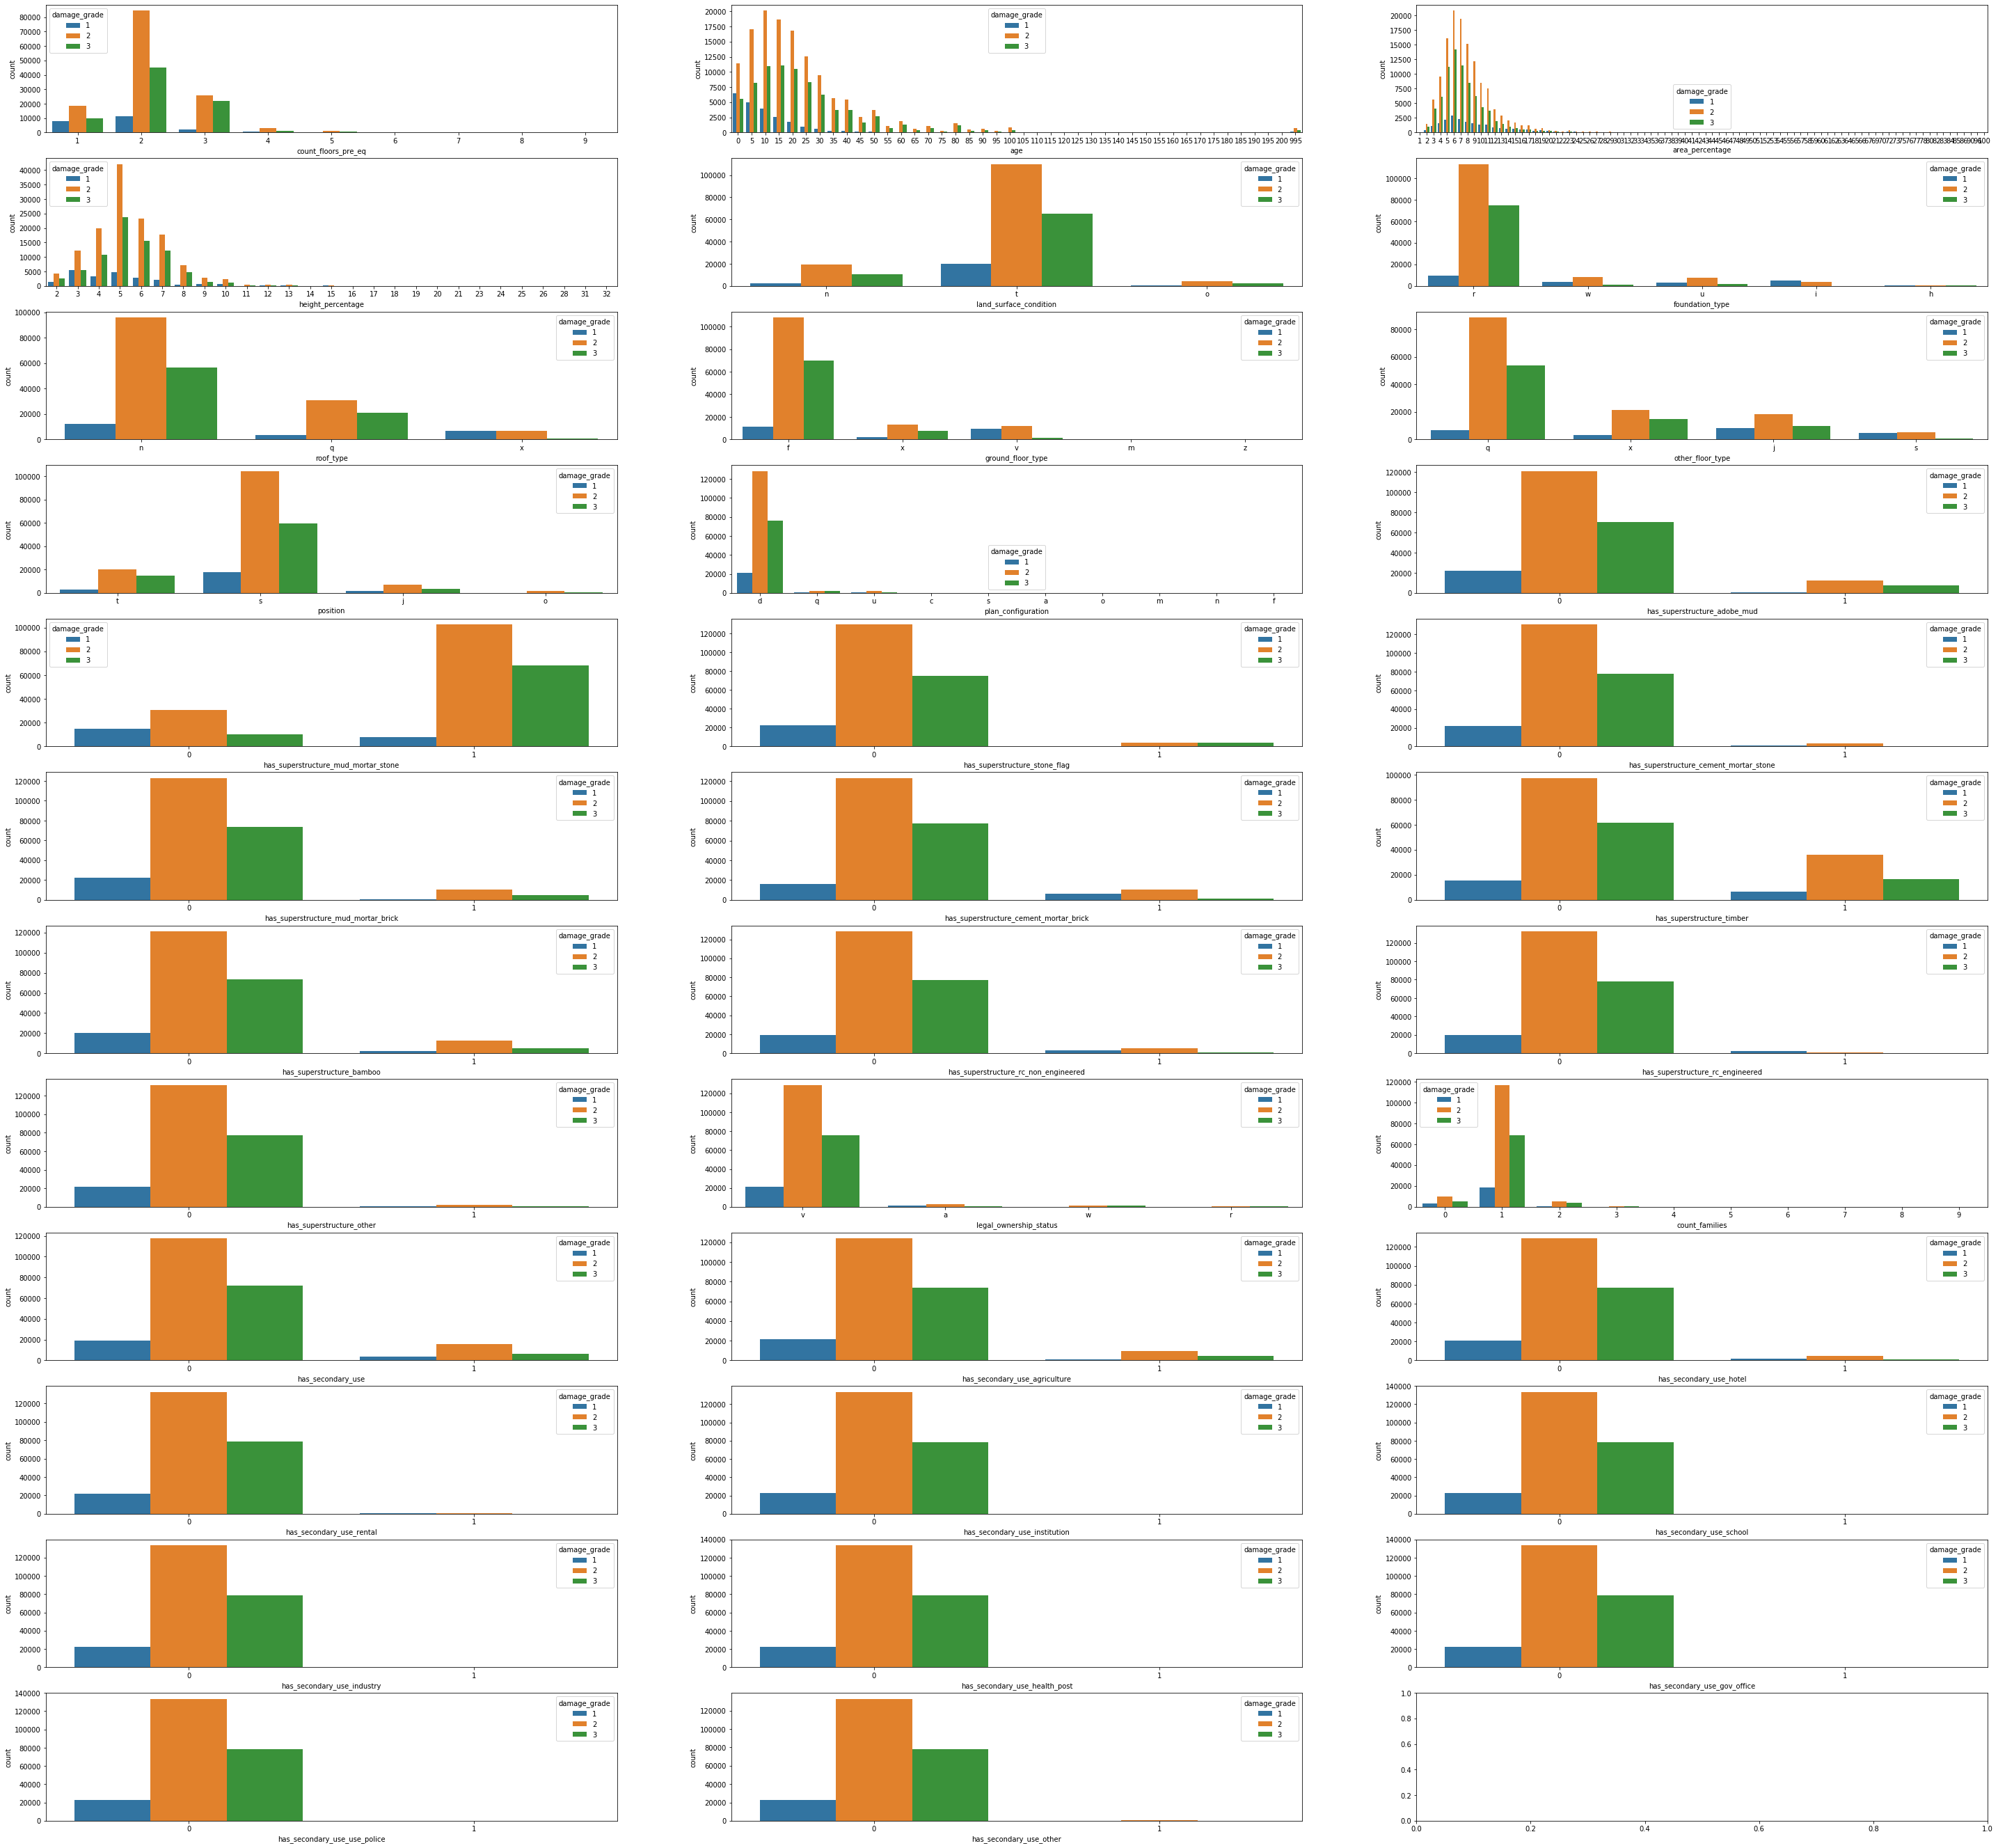

In [18]:
import math

nrows = math.ceil(len(X_train.columns[3:])/3)

fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(50,nrows*4))
idx = 3
for i in range(nrows):
  for j in range(3):
    if idx >= len(X_train.columns): 
      break
    sns.countplot(x=X_train.columns[idx], data=train,hue='damage_grade', ax=axes[i,j])
    idx += 1

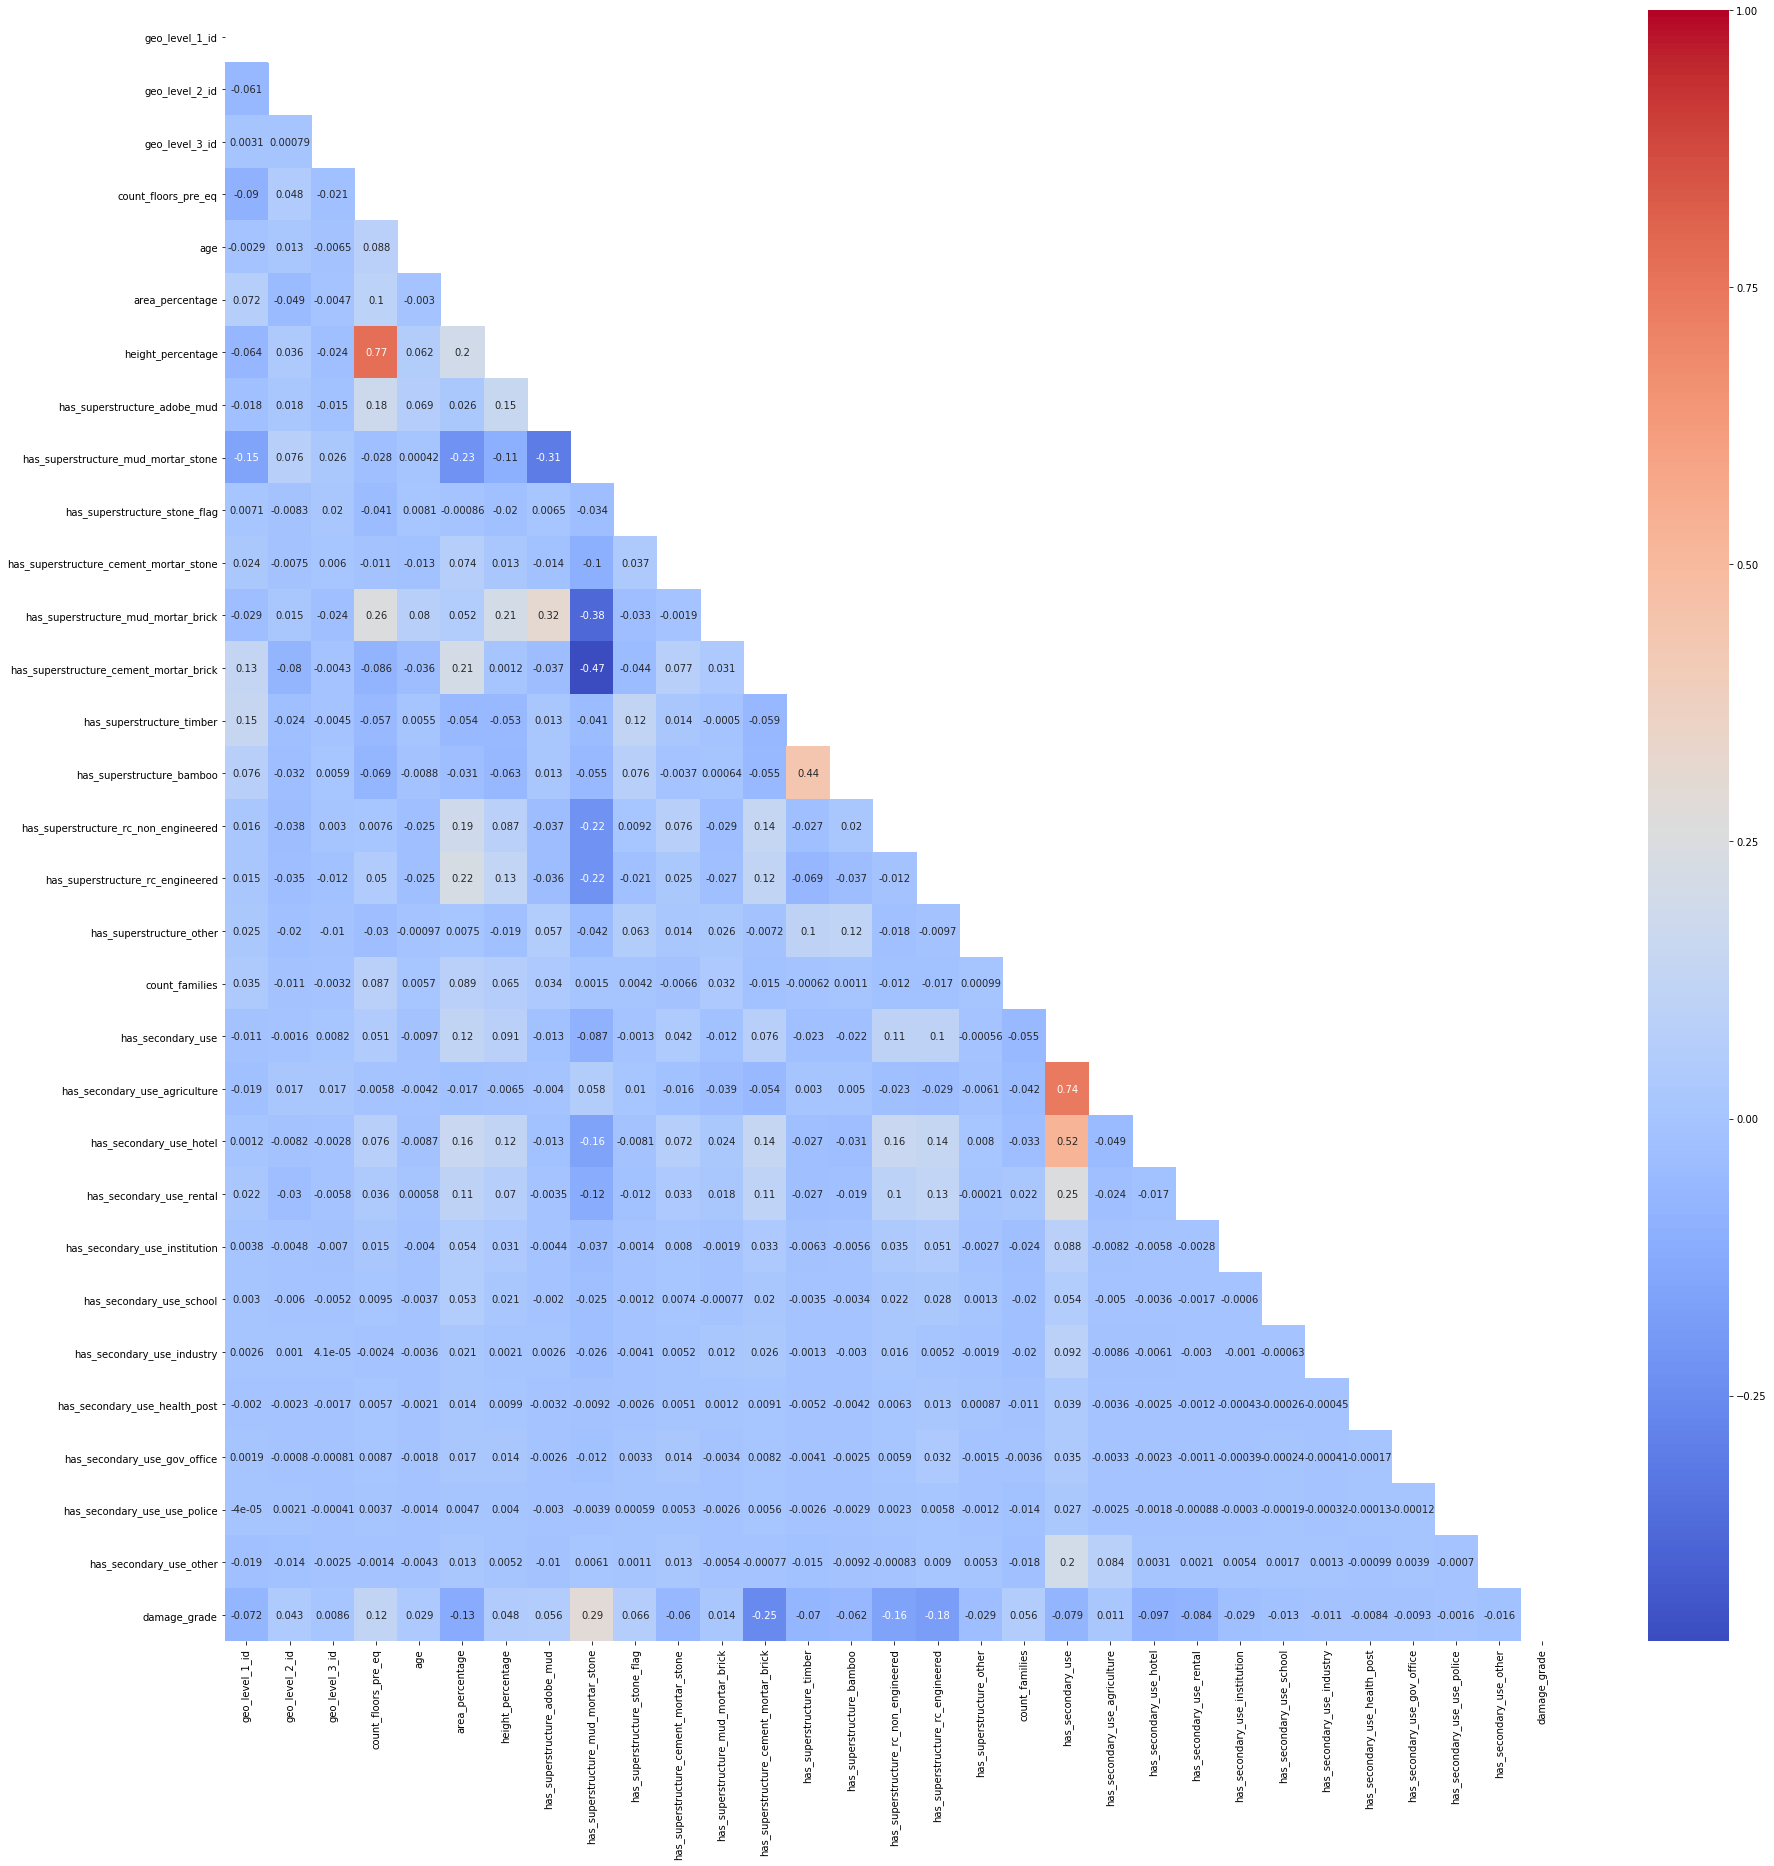

In [19]:
import numpy as np
corr = X_train.join(y_train).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, mask=mask, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap='coolwarm')
plt.show()